In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

# 读取用户上传的文件内容
# file_path = '/step2000_A=2/paper_diffbeta'
file_path = 'step2000_A=2/paper_diffbeta'
df = pd.read_csv(file_path)

# 显示数据的前几行
df.head()

,0.1,"(100, 90)","(41, 40)","(40, 26)"
0,0.2,"(43, 35)","(100, 100)","(41, 27)"
1,0.3,"(60, 19)","(31, 35)","(50, 16)"
2,0.4,"(53, 29)","(51, 21)","(54, 40)"
3,0.5,"(47, 26)","(55, 33)","(32, 21)"
4,0.6,"(55, 34)","(17, 20)","(84, 59)"


In [52]:
plt.rc('font', family='Microsoft JhengHei')
res={}
with open('step2000_A=2/paper_diffbeta', mode='r') as f:
    reader=csv.reader(f)
    for row in reader:
        if (len(row)==0):
            continue
        row[0]=float(row[0])
        for i in range(1, len(row)):
            row[i]=row[i].replace('(','')
            row[i]=row[i].replace(')','')
            row[i]=row[i].replace(',','')
            row[i]=tuple(map(float, row[i].split(' ')))
        print(row)
        res[row[0]]=[row[i] for i in range(1, 4)]
        
# dict_from_csv={int(k): v for k, v in dict_from_csv.items()}

print(res)

[0.1, (100.0, 90.0), (41.0, 40.0), (40.0, 26.0)]
[0.2, (43.0, 35.0), (100.0, 100.0), (41.0, 27.0)]
[0.3, (60.0, 19.0), (31.0, 35.0), (50.0, 16.0)]
[0.4, (53.0, 29.0), (51.0, 21.0), (54.0, 40.0)]
[0.5, (47.0, 26.0), (55.0, 33.0), (32.0, 21.0)]
[0.6, (55.0, 34.0), (17.0, 20.0), (84.0, 59.0)]
[0.7, (50.0, 39.0), (44.0, 31.0), (99.0, 100.0)]
[0.8, (35.0, 34.0), (41.0, 39.0), (57.0, 51.0)]
[0.9, (40.0, 46.0), (21.0, 19.0), (39.0, 40.0)]
[1.0, (16.0, 28.0), (28.0, 36.0), (20.0, 21.0)]
{0.1: [(100.0, 90.0), (41.0, 40.0), (40.0, 26.0)], 0.2: [(43.0, 35.0), (100.0, 100.0), (41.0, 27.0)], 0.3: [(60.0, 19.0), (31.0, 35.0), (50.0, 16.0)], 0.4: [(53.0, 29.0), (51.0, 21.0), (54.0, 40.0)], 0.5: [(47.0, 26.0), (55.0, 33.0), (32.0, 21.0)], 0.6: [(55.0, 34.0), (17.0, 20.0), (84.0, 59.0)], 0.7: [(50.0, 39.0), (44.0, 31.0), (99.0, 100.0)], 0.8: [(35.0, 34.0), (41.0, 39.0), (57.0, 51.0)], 0.9: [(40.0, 46.0), (21.0, 19.0), (39.0, 40.0)], 1.0: [(16.0, 28.0), (28.0, 36.0), (20.0, 21.0)]}


In [53]:
alpha=[]
price=[]
eposide=[i for i in res]
for i in range(1,11):
    i=i/10
    avg_alpha_i=(res[i][0][0]+res[i][1][0]+res[i][2][0])/3
    avg_alpha_i=avg_alpha_i/100
    alpha.append(avg_alpha_i)
    avg_price_i=(res[i][0][1]+res[i][1][1]+res[i][2][1])/3
    avg_price_i=avg_price_i/100
    price.append(avg_price_i)
    # print(avg_alpha_i, avg_price_i)
print(alpha)
print(price)
print(eposide)
# plt.figure(figsize=(12,3))
# plt.xlim(0.1, 1) 
# plt.ylim(0, 1)
# plt.plot(eposide, alpha, 'r')
# plt.plot(eposide, price, 'b')
# plt.legend(labels=['廣告數量', '付費價格'])

[0.6033333333333334, 0.6133333333333334, 0.47, 0.5266666666666666, 0.44666666666666666, 0.52, 0.6433333333333333, 0.44333333333333336, 0.33333333333333337, 0.21333333333333332]
[0.52, 0.54, 0.2333333333333333, 0.3, 0.26666666666666666, 0.37666666666666665, 0.5666666666666667, 0.41333333333333333, 0.35, 0.2833333333333333]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


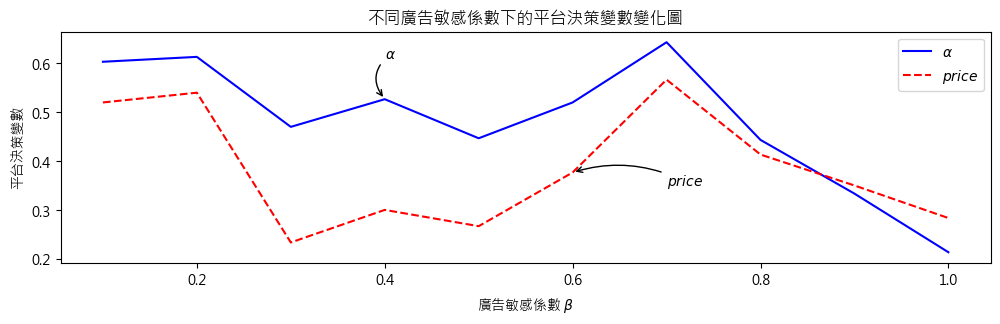

In [56]:


# 創建圖表
fig, ax = plt.subplots(figsize=(12, 3))

# 繪製曲線
ax.plot(eposide, alpha, label=r'$\alpha$', color='blue', linestyle='-')
ax.plot(eposide, price, label=r'$price$', color='red', linestyle='--')

# 添加標註和箭頭
ax.annotate(r'$\alpha$',
            xy=(0.4, alpha[3]), xycoords='data', # xy 是標註箭頭指向的位置。
            xytext=(0.4, 0.61), textcoords='data', # xytext 是標註文字的位置。
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.5"))

ax.annotate(r'$price$',
            xy=(0.6, price[5]), xycoords='data',
            xytext=(0.7, 0.35), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2"))


# # 添加垂直虛線
# ax.axvline(x=0.1, color='black', linestyle=':')
# ax.axvline(x=0.31, color='black', linestyle=':')
# ax.axvline(x=0.52, color='black', linestyle=':')

# 設置標籤和標題

ax.set_xlabel(r'廣告敏感係數 $\beta$')
ax.set_ylabel(r'平台決策變數')
ax.set_title('不同廣告敏感係數下的平台決策變數變化圖')

# 顯示圖例
ax.legend()

# 顯示圖表
plt.show()
